<a href="https://colab.research.google.com/github/addicted-ai/PCA/blob/main/iris_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Supress Warning
import warnings
warnings.filterwarnings('ignore')

In [27]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Loading Dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/addicted-ai/PCA/main/dataset/Iris.csv")
df.head(8)

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Splitting X & Y

In [6]:
y = df.pop('iris')

In [7]:
df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
X = df.copy()

## Scaling Features

In [9]:
scaler = StandardScaler()

In [10]:
x = scaler.fit_transform(X)
x[:5,:]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

## Applying PCA

In [11]:
pca = PCA(random_state=100)

In [12]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [13]:
pca.components_

array([[ 0.52237162, -0.26335492,  0.58125401,  0.56561105],
       [ 0.37231836,  0.92555649,  0.02109478,  0.06541577],
       [-0.72101681,  0.24203288,  0.14089226,  0.6338014 ],
       [-0.26199559,  0.12413481,  0.80115427, -0.52354627]])

In [14]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523, 0.03683832, 0.00515193])

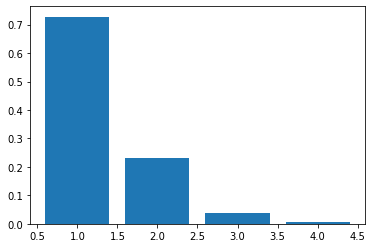

In [16]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)
plt.show()

In [17]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.72770452, 0.95800975, 0.99484807, 1.        ])

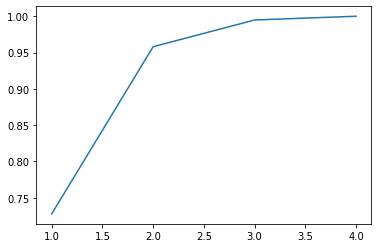

In [18]:
# Scree Plot
plt.plot(range(1,len(var_cumu)+1), var_cumu)
plt.show()

- We can see that 1st 2 component can describe data 95% & including 3rd one would explain 99% of data.

In [19]:
pca2 = PCA(n_components=2, random_state=100)

In [21]:
newdf = pca2.fit_transform(x)

In [30]:
print(newdf.shape)
df2 = pd.DataFrame(newdf,columns=['PC1', 'PC2'])
df2.head()

(150, 2)


,PC1,PC2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [31]:
df_final = pd.concat([df2, y ], axis=1)

In [32]:
df_final.head(8)

,PC1,PC2,iris
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
5,-2.070537,1.518549,Iris-setosa
6,-2.445711,0.074563,Iris-setosa
7,-2.233842,0.247614,Iris-setosa


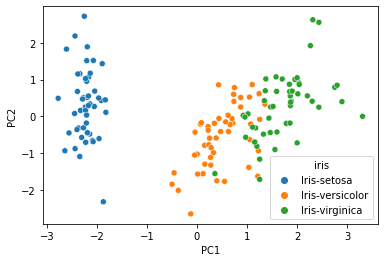

In [38]:
sns.scatterplot(data=df_final, x='PC1', y='PC2', hue='iris')
plt.show()